#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

In [ ]:
Reda Assi

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [45]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [23]:
##The first question
print("name of columns :",df.columns)
print("Number of rows and columns:", df.shape)
print("Data types of each column:\n", df.dtypes)
# القيم الفارغة
print("Missing values in each column:\n", df.isnull().sum())

name of columns : Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')
Number of rows and columns: (148654, 13)
Data types of each column:
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
Missing values in each column:
 Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency   

In [24]:
##The second question
# الإحصائيات الأساسية لعمود الرواتب
salary_column = df['BasePay']

mean_salary = salary_column.mean()
median_salary = salary_column.median()
mode_salary = salary_column.mode().values[0]
min_salary = salary_column.min()
max_salary = salary_column.max()
salary_range = max_salary - min_salary
std_dev_salary = salary_column.std()

# طباعة النتائج
print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)
print("Mode Salary:", mode_salary)
print("Minimum Salary:", min_salary)
print("Maximum Salary:", max_salary)
print("Salary Range:", salary_range)
print("Standard Deviation of Salary:", std_dev_salary)

Mean Salary: 66325.44884050643
Median Salary: 65007.45
Mode Salary: 0.0
Minimum Salary: -166.01
Maximum Salary: 319275.01
Salary Range: 319441.02
Standard Deviation of Salary: 42764.63549525958


In [25]:
##The third question
# تعويض القيم المفقودة بمتوسط الرواتب
df['BasePay'].fillna(mean_salary, inplace=True)

# طباعة النتائج
print("القيم المفقودة في كل عمود:\n", df.isnull().sum())
print("الإحصائيات الأساسية بعد التعويض:\n", df.describe())

القيم المفقودة في كل عمود:
 Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64
الإحصائيات الأساسية بعد التعويض:
                   Id        BasePay    OvertimePay       OtherPay  \
count  148654.000000  148654.000000  148650.000000  148650.000000   
mean    74327.500000   66325.448841    5066.059886    3648.767297   
std     42912.857795   42676.946745   11454.380559    8056.601866   
min         1.000000    -166.010000      -0.010000   -7058.590000   
25%     37164.250000   33847.017500       0.000000       0.000000   
50%     74327.500000   65092.190000       0.000000     811.270000   
75%    111490.750000   94605.740000    4658.175000    4236.065000   
max    148654.000000  

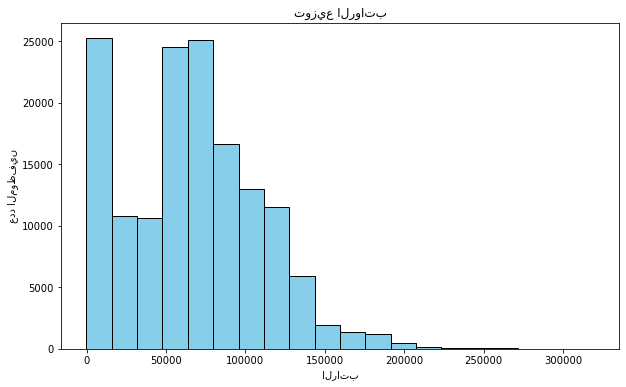

In [26]:
##The fourth question
# رسم هيستوغرام لتوزيع الرواتب
plt.figure(figsize=(10, 6))
plt.hist(df['BasePay'], bins=20, color='skyblue', edgecolor='black')
plt.title('توزيع الرواتب')
plt.xlabel('الراتب')
plt.ylabel('عدد الموظفين')
plt.show()

In [34]:
#the fifth question
grouped_data = df.groupby('JobTitle')

# Calculate summary statistics for each group
summary_statistics = grouped_data.describe()

# Display the summary statistics
print(summary_statistics)

                                                   Id                \
                                                count          mean   
JobTitle                                                              
account clerk                                   351.0  83122.319088   
accountant                                        5.0  24159.200000   
accountant i                                      8.0  89791.500000   
accountant ii                                   226.0  93921.393805   
accountant iii                                  278.0  90994.359712   
...                                               ...           ...   
worker's compensation supervisor i                5.0  11453.800000   
x-ray laboratory aide                           126.0  83127.904762   
youth comm advisor                                4.0  99677.750000   
youth commission advisor, board of supervisors    1.0  23392.000000   
zoo curator                                       1.0  18779.000000   

     

Correlation between BasePay and TotalPay: 0.9505142922626428


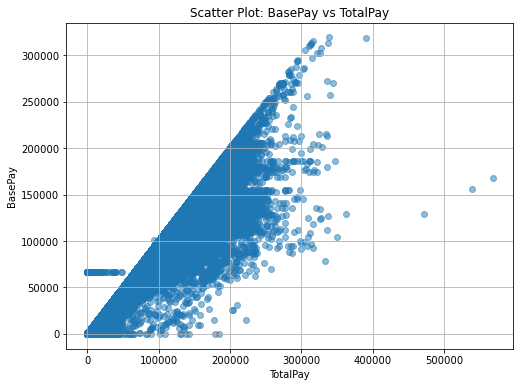

In [44]:
#the sixth question
correlation = df['BasePay'].corr(df['TotalPay'])

# Print the correlation coefficient
print(f"Correlation between BasePay and TotalPay: {correlation}")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['TotalPay'], df['BasePay'], alpha=0.5)
plt.title('Scatter Plot: BasePay vs TotalPay')
plt.xlabel('TotalPay')
plt.ylabel('BasePay')
plt.grid(True)
plt.show()

In [ ]:
#The Seventh question
         
1.	Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.


            Library included : pandas In order to deal with the data , numpy For calculations
            
            Data has been read from the file ('Salaries.csv')
             
            The number of columns is found using   (df.columns)

            The Shape is found using   (df.shape) 

            The type of Data using   (df.dtypes)

            The type of Data using   (df.isnull().sum())




2.	Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.


         The mean of salary is found using   (mean())  

         The median of salary is found using   (median())

         The mode of salary is found using   (mode().values[0])
        
         The min of salary is found using   (min())

         The max of salary is found using   (max())
       
         The range of salary is found using   (range())

         The Standard Deviation of salary is found using   (std_dev_salary)









3.	Data Cleaning: Handle missing data by suitable method with explain why you use it.

            Missing values were handled by replacing the median using                                                                                                 (df['BasePay'].fillna(mean_salary, inplace=True))



4.	Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

            Library included : matplotlib.pyplot

            The histogram of salary distribution was drawn using 20 bins


5.	Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

        
          The data has been grouped by column     ('JobTitle')  and a separate  group has been created for each function

    
          Comprehensive statistics were applied using (grouped_data.describe())


6.	Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.


          The correlation coefficient was calculated using correlation() Then create a plot of points on the grid
          
          


# Good Luck!